# Lets look at individual feature distributions to determine which ones are or could be made applicable for linear regression


In [7]:
# all libraries required for the entire EDA

from requests import get
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # Samuel Norman "Sam" Seaborn is a fictional character portrayed by Rob Lowe on the television serial drama The West Wing. Hence: sns
from seaborn_qqplot import pplot
import pandas as pd

import datetime as dt
from scipy import stats
from sklearn import linear_model 
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN

import fitter
from fitter import Fitter

%matplotlib inline
sns.set(color_codes=True)

In [8]:
temp = pd.read_csv('df4.csv',skipinitialspace=True)
temp = temp.drop('Unnamed: 0', axis=1)
temp.head()

genetic  length   mass  exercise  smoking  alcohol  lifespan  sugar   bmi
0     73.9   185.0   99.7       0.9      0.0      2.4      73.1    6.9  29.1
1     86.0   172.0  105.4       1.8      8.1      0.4      85.0    4.2  35.6
2     83.3   176.0  111.4       1.1      0.8      4.6      81.6    7.5  36.0
3     82.8   164.0  111.4       4.7     11.8      1.0      81.0    2.9  41.4
4     78.7   178.0   71.6       1.5      8.3      4.9      75.0    5.5  22.6

Fitting 7 distributions: 100%|██████████| 7/7 [00:01<00:00,  4.26it/s]


sumsquare_error         aic           bic    kl_div  ks_statistic  \
chi2             0.002711  846.011099 -56443.000902  0.023237      0.019291   
lognorm          0.002723  840.624545 -56426.382489  0.021565      0.017927   
pearson3         0.002728  840.731962 -56418.609127  0.021600      0.018234   
norm             0.002907  838.028278 -56173.840173  0.022377      0.024839   
t                0.002908  840.119185 -56164.620143  0.022385      0.024927   

          ks_pvalue  
chi2       0.102287  
lognorm    0.153276  
pearson3   0.140286  
norm       0.014536  
t          0.014037

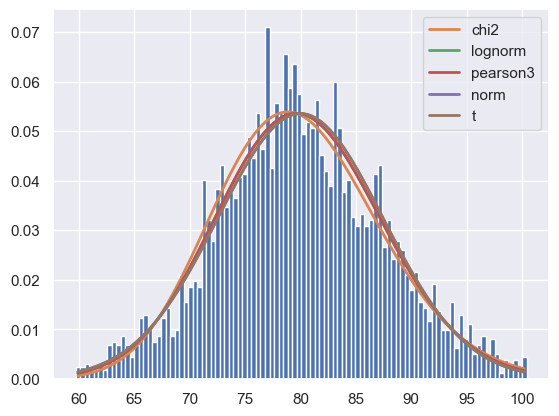

In [9]:
feature = np.array(temp['lifespan'])
f = Fitter(feature, distributions=['norm','uniform','t','pearson3','loguniform', 'lognorm','chi2'])
f.fit()
f.summary()

In [11]:
stat, p_val = stats.normaltest(temp['lifespan'])
print('\nNormaltest p-value is: {:1.2e} \n'.format(p_val))


Normaltest p-value is: 9.17e-03 



In [12]:
stats.shapiro(temp['lifespan'])

ShapiroResult(statistic=0.9970240592956543, pvalue=4.6912620632610924e-07)

lifespan is normally distributed ✅

Fitting 8 distributions: 100%|██████████| 8/8 [00:02<00:00,  3.94it/s]


sumsquare_error         aic           bic    kl_div  ks_statistic  \
lognorm          0.004914  800.391777 -54077.834486  0.035105      0.022440   
f                0.004932  802.346671 -54055.565801  0.035148      0.022745   
pearson3         0.004934  800.320745 -54062.075740  0.035169      0.022810   
chi2             0.004969  798.644708 -54033.643362  0.036058      0.032529   
norm             0.005126  798.096192 -53918.458360  0.035757      0.025696   

          ks_pvalue  
lognorm    0.035885  
f          0.032151  
pearson3   0.031411  
chi2       0.000432  
norm       0.010293

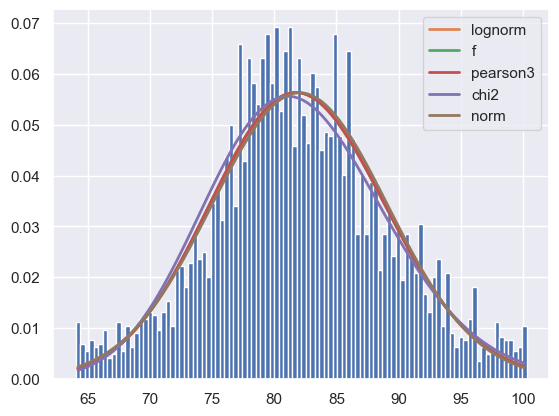

In [13]:
feature = np.array(temp['genetic'])
f = Fitter(feature, distributions=['norm','uniform','t','pearson3','loguniform', 'lognorm','chi2', 'f'])
f.fit()
f.summary()

In [15]:
stat, p_val = stats.normaltest(temp['genetic'])
print('\nNormaltest p-value is: {:1.2e} \n'.format(p_val))


Normaltest p-value is: 9.92e-02 



genetic is normally distributed ✅

Fitting 5 distributions: 100%|██████████| 5/5 [00:01<00:00,  3.80it/s]


sumsquare_error         aic           bic  kl_div  ks_statistic  \
f                4.111158  407.431865 -27307.044415     inf      0.043585   
chi2             4.111167  405.430773 -27315.323988     inf      0.043587   
pearson3         4.111176  405.434068 -27315.315977     inf      0.043598   
t                4.304914  410.138143 -27132.182508     inf      0.082196   
norm             4.304976  408.134488 -27140.413592     inf      0.082222   

             ks_pvalue  
f         5.295533e-07  
chi2      5.289135e-07  
pearson3  5.246946e-07  
t         8.028411e-24  
norm      7.766948e-24

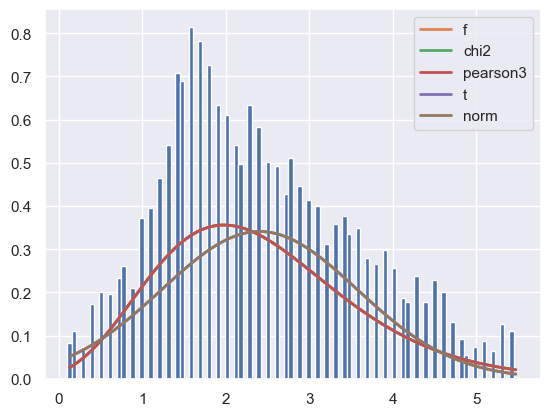

In [16]:
feature = np.array(temp['exercise'])
f = Fitter(feature, distributions=['norm','t','pearson3','chi2', 'f'],timeout=60)
f.fit()
f.summary()

In [18]:
stat, p_val = stats.normaltest(temp['exercise'])
print('\nNormaltest p-value is: {:1.2e} \n'.format(p_val))


Normaltest p-value is: 9.54e-39 



Visually compared with the p-value we assume normal distribution for exercise ✅

Fitting 8 distributions: 100%|██████████| 8/8 [00:02<00:00,  3.53it/s]


sumsquare_error         aic           bic    kl_div  ks_statistic  \
chi2             0.073526  698.379559 -43318.046119  0.182645      0.133043   
pearson3         0.084420  692.318104 -42768.570424  0.188190      0.129542   
uniform          0.085544  624.018458 -42724.271705  0.089577      0.109113   
lognorm          0.122732  669.458272 -41280.385843  0.181885      0.074674   
norm             0.124504  664.031272 -41231.660909  0.178614      0.079879   

             ks_pvalue  
chi2      7.573578e-62  
pearson3  1.203772e-58  
uniform   1.085683e-41  
lognorm   9.867668e-20  
norm      1.609785e-22

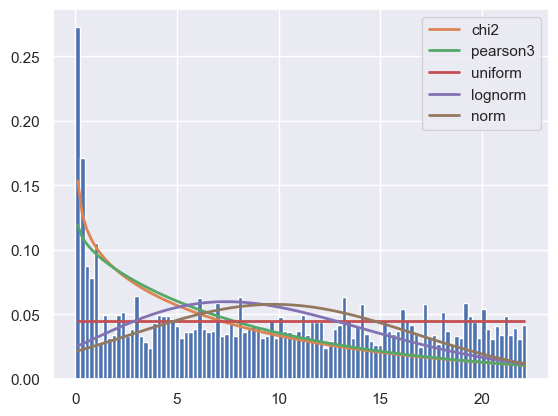

In [19]:
feature = np.array(temp['smoking'])
f = Fitter(feature, distributions=['norm','uniform','t','pearson3','loguniform', 'lognorm','chi2', 'f'])
f.fit()
f.summary()

In [21]:
stat, p_val = stats.normaltest(temp['smoking'])
print('\nNormaltest p-value is: {:1.2e} \n'.format(p_val))


Normaltest p-value is: 0.00e+00 



Smoking uniform distributed but with an outliers at 0-2

Fitting 3 distributions: 100%|██████████| 3/3 [00:00<00:00,  7.87it/s]


sumsquare_error         aic           bic  kl_div  ks_statistic  \
lognorm         3.385065  450.046762 -28969.100637     inf      0.114243   
chi2            3.604262  433.288796 -28712.728390     inf      0.094344   
norm            4.525048  414.548237 -27791.433293     inf      0.158893   

            ks_pvalue  
lognorm  6.522429e-47  
chi2     4.202615e-32  
norm     1.402009e-90

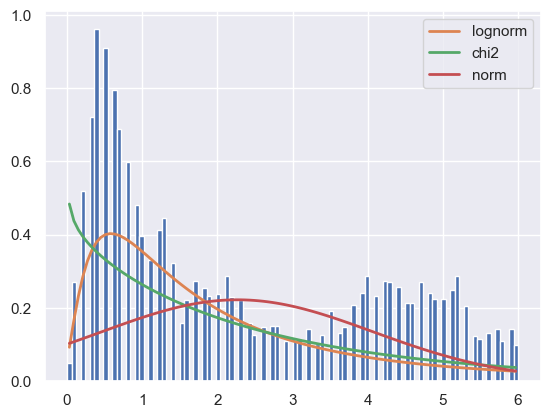

In [ ]:
feature = np.array(temp['alcohol'])
f = Fitter(feature, distributions=['norm','lognorm','chi2'], timeout= 60,)
f.fit()
f.summary()

Fitting 3 distributions: 100%|██████████| 3/3 [00:00<00:00,  7.39it/s]


sumsquare_error         aic           bic    kl_div  ks_statistic  \
chi2            0.122975  586.825783 -42514.798688  0.080887      0.028993   
lognorm         0.123500  587.570744 -42497.391299  0.081351      0.028641   
norm            0.127998  589.887810 -42359.545190  0.086407      0.037222   

         ks_pvalue  
chi2      0.002037  
lognorm   0.002405  
norm      0.000024

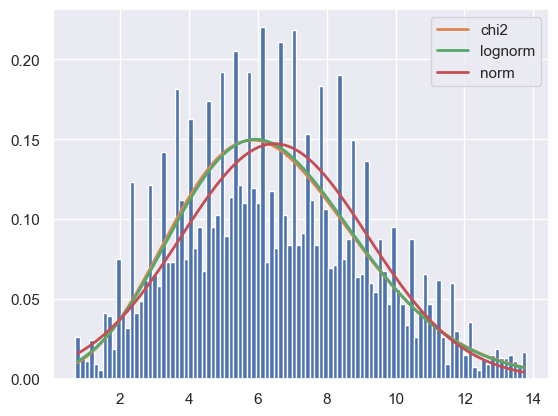

In [ ]:
feature = np.array(temp['sugar'])
f = Fitter(feature, distributions=['norm','lognorm','chi2'], timeout= 60,)
f.fit()
f.summary()

> pip install --upgrade linear-tree

In [ ]:
from sklearn.linear_model import LinearRegression
from lineartree import LinearTreeRegressor

regr = LinearTreeRegressor(base_estimator=LinearRegression())
regr.fit(X, y)

LinearTreeRegressor(base_estimator=LinearRegression())

In [ ]:
p_test = regr.predict(X_test)

<Axes: >

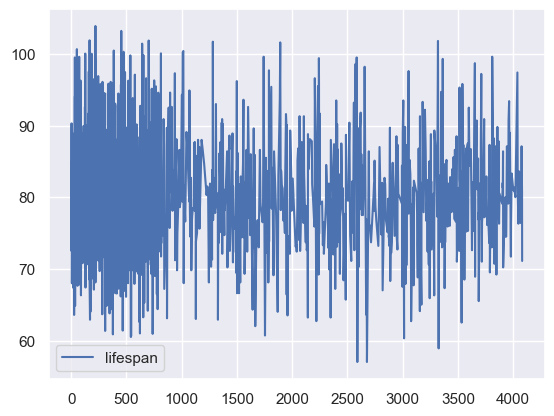

In [ ]:
sns.lineplot(p_test)
sns.lineplot(y_test)